In [1]:
import scipy.stats as stats
import numpy
import matplotlib.pyplot as pyplot
from collections import Counter, defaultdict

from scipy.stats import (
    norm, binom, expon, t, chi2, pareto, ttest_ind, sem, beta, laplace, ttest_1samp
)
from statsmodels.stats.proportion import proportion_confint
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn
from tqdm.notebook import tqdm

import sys
sys.path.append('.')

import warnings
warnings.filterwarnings("ignore")

In [2]:
def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in pyplot.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = pyplot.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    pyplot.rcParams.update(update_dict)
    pyplot.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = pyplot.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    pyplot.rcParams['legend.edgecolor'] = lec

In [3]:
inverse_plot_colorscheme()

In [4]:
# s1 = stats.gamma(a=1.75, scale=2).rvs(1000)
# s2 = stats.gamma(a=1.75, scale=2).rvs(1000)


# numpy.quantile(s1, 0.75)

In [5]:
# numpy.save('bootstrap_example_1.npy', s1)

# –õ–µ–∫—Ü–∏—è X. Bootstrap

–ù–∞ —Ç–µ–∫—É—â–µ–π –ª–µ–∫—Ü–∏–∏ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –æ–¥–∏–Ω –∏–∑ –≥–ª–∞–≤–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª–∏—Ç –≤–∞–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –ª—é–±–æ–π —Å–∫–æ–ª—å —É–≥–æ–¥–Ω–æ —Å–ª–æ–∂–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã, –∫–æ—Ç–æ—Ä–∞—è –º–æ–∂–µ—Ç —É –≤–∞—Å –≤–æ–∑–Ω–∏–∫–Ω—É—Ç—å –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ.

–î–∞–≤–∞–π—Ç–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª–µ–¥—É—é—â—É—é –∑–∞–¥–∞—á—É:

> üìà **–ó–∞–¥–∞—á–∞**
>
> –í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–º –≤ —Ç–∞–∫—Å–∏. –ù–µ–¥–∞–≤–Ω–æ –æ–¥–∏–Ω –∏–∑ –º–µ–Ω–µ–¥–∂–µ—Ä–æ–≤ –∫–æ–º–ø–∞–Ω–∏–∏ –ø—Ä–∏—à–µ–ª –∫ –Ω–∞–º —Å –∏–¥–µ–µ–π, —á—Ç–æ —É –Ω–∞—Å –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ —á–∞—Å—Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –≤–æ–¥–∏—Ç–µ–ª—å, –∫–æ—Ç–æ—Ä—ã–π –æ—á–µ–Ω—å –¥–∞–ª–µ–∫–æ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –ò —ç—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –æ—Ç—Ç–æ–∫—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞—à–µ–≥–æ —Å–µ—Ä–≤–∏—Å–∞.
>
> –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –≤ –±—É–¥—É—â–µ–º –æ—Ü–µ–Ω–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ –≤—ã —É–ª—É—á—à–∏–ª–∏ –∞–ª–≥–æ—Ä–∏—Ç–º –ø–æ–¥–±–æ—Ä–∞ –≤–æ–¥–∏—Ç–µ–ª–µ–π, –≤—ã —Ä–µ—à–∞–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å 75 –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è —Ç–∞–∫—Å–∏ –∫–∞–∫ –æ—Å–Ω–æ–≤–Ω—É—é –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞. –í–∞—à–∞ –∑–∞–¥–∞—á–∞ —Å–µ–π—á–∞—Å –æ—Ü–µ–Ω–∏—Ç—å —Ç–µ–∫—É—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏, —á—Ç–æ–±—ã –≤ –±—É–¥—É—â–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–∞–∫ –±–µ–π–∑–ª–∞–π–Ω.

–ó–∞–ø–∏—à–µ–º –∑–∞–¥–∞—á—É –Ω–∞ —è–∑—ã–∫–µ –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏:

- –ü—É—Å—Ç—å $X$ &mdash; –≤—ã–±–æ—Ä–∫–∞ –º–µ—Ç—Ä–∏–∫–∏ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è —Ç–∞–∫—Å–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º, $X_{[0.75]}$ &mdash; 75 –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å —ç—Ç–æ–π –≤—ã–±–æ—Ä–∫–∏.

–ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ:

In [6]:
sample = numpy.load('bootstrap_example_1.npy')

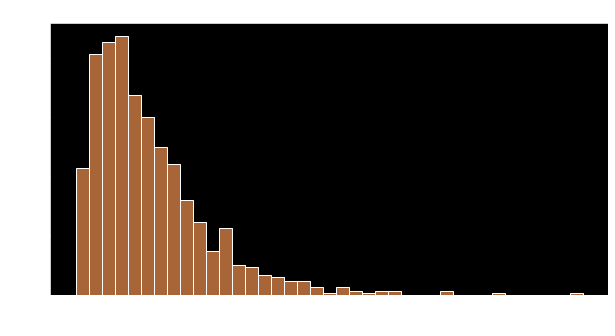

In [7]:
pyplot.figure(figsize=(10, 5))
pyplot.title('–í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è —Ç–∞–∫—Å–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏', fontsize=12)
seaborn.histplot(sample, stat='density')
pyplot.xlabel('–í—Ä–µ–º—è(–º–∏–Ω—É—Ç—ã)', fontsize=12)
pyplot.show()

In [8]:
print(f"–û—Ü–µ–Ω–∫–∞ 75 –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–∏: {round(numpy.percentile(sample, 75), 3)}")

–û—Ü–µ–Ω–∫–∞ 75 –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–∏: 4.596


–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–µ–∫–æ—Ç–æ—Ä—É—é –æ—Ü–µ–Ω–∫—É. –ù–æ –º—ã –∑–Ω–∞–µ–º, —á—Ç–æ —Ö–æ—Ä–æ—à–∏–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –¥–æ–ª–∂–µ–Ω –Ω–µ —Ç–æ–ª—å–∫–æ —É–º–µ—Ç—å –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–æ –∏ —Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –Ω–µ–µ. 

–ù–æ –ø–æ–∫–∞ –º—ã –Ω–µ –∑–Ω–∞–µ–º –∫–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å.

----

### –ò–¥–µ—è 1: –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É, –ø–µ—Ä–µ–π–¥–µ–º –∫ –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π –≤—ã–±–æ—Ä–∫–µ, —É –∫–æ—Ç–æ—Ä–æ–π –º—ã —É–∂–µ –≤—Å–µ –∑–Ω–∞–µ–º: –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –∏–∑ –∫–æ—Ç–æ—Ä–æ–≥–æ –æ–Ω–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∞, –∏ –∏—Å—Ç–∏–Ω–Ω—ã–π –∫–≤–∞–Ω—Ç–∏–ª—å. –ò –Ω–∞ –µ–µ –ø—Ä–∏–º–µ—Ä–µ –ø–æ–ø—ã—Ç–∞–µ–º—Å—è —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É.

In [9]:
numpy.random.seed(42)
N = 20000
example_dist = stats.gamma(a=2, scale=3)
example_sample = example_dist.rvs(N)

- –ü—É—Å—Ç—å $\theta$ &mdash; –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–≤–∞–Ω—Ç–∏–ª–∏, –∫–æ—Ç–æ—Ä–æ–µ –º—ã –Ω–µ –∑–Ω–∞–µ–º. –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ª—é–±–∞—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞: –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ, –¥–∏—Å–ø–µ—Ä—Å–∏—è –∏ —Ç.–¥.
- $\widehat{\theta}$ &mdash; –ø–æ–ª—É—á–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ $\theta$ –ø–æ –≤—ã–±–æ—Ä–∫–µ. –í –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –∑–∞–¥–∞—á–µ –µ–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–≤–Ω–∞ 4.596.

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á–µ–º—É –æ–Ω–∏ —Ä–∞–≤–Ω—ã –≤ –Ω–∞—à–µ–º –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ.

In [10]:
theta = example_dist.ppf(0.75)
theta_estim = numpy.percentile(example_sample, 75)

print(f"theta = {round(theta, 3)}")
print(f"theta estim = {round(theta_estim, 3)}")

theta = 8.078
theta estim = 8.106


–ö–∞–∫ –ø–æ—Å—Ç–æ—Ä–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è $\theta$? 

1. –î–ª—è —ç—Ç–æ–≥–æ –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø–µ—Ä–≤—ã–º —à–∞–≥–æ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\Delta = \widehat{\theta} - \theta$.
    - –°–º—ã—Å–ª &mdash; –ø–æ–Ω—è—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ –º–æ–∂–µ—Ç —à—É–º–µ—Ç—å –æ—Ü–µ–Ω–∫–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è. –î–∞–ª–µ–µ, —Å –ø–æ–º–æ—â—å—é —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º—ã –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª.
    - –ü–æ–∫–∞ –º—ã –±—É–¥–µ–º –∏—Å—Ö–æ–¥–∏—Ç—å, —á—Ç–æ –º—ã –∑–Ω–∞–µ–º $\theta$ –∏ –∏—Å—Ç–∏–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ù–æ –¥–∞–ª–µ–µ –º—ã —Å–º–æ–∂–µ–º –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —ç—Ç–æ–≥–æ.

–ü–æ—Å—Ç—Ä–æ–∏–º —ç—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è –Ω–∞—à–µ–π –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏. –î–∞–≤–∞–π—Ç–µ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –ª—é–±–∏–º—ã–º –º–µ—Ç–æ–¥–æ–º: –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ. 

–ú—ã –ø–æ—Å—Ç—Ä–æ–∏–º –≤—ã–±–æ—Ä–∫—É $\Delta_1,\ \dots,\ \Delta_B $. –î–ª—è —ç—Ç–æ–≥–æ:

- –ù–∞—Å–µ–º–ø–ª–∏—Ä—É–µ–º `B` —Ä–∞–∑ –∏–∑ –Ω–∞—à–µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è `example_dist` –≤—ã–±–æ—Ä–∫—É.
    - `B` –≤–æ–∑—å–º–µ–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∏–º: –Ω–∞–ø—Ä–∏–º–µ—Ä, 10000.
    - –†–∞–∑–º–µ—Ä –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–≤–µ–Ω N, –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É –≤—ã–±–æ—Ä–∫–∏. –í–µ–¥—å –º—ã —Ö–æ—Ç–∏–º –æ—Ü–µ–Ω–∏—Ç—å $\widehat{\theta} - \theta$, –≥–¥–µ $\widehat{\theta}$–ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –ø–æ –≤—ã–±–æ—Ä–∫–µ —Ä–∞–∑–º–µ—Ä–∞ N. –ï—Å–ª–∏ –≤–∑—è—Ç—å —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à—É—é –≤—ã–±–æ—Ä–∫—É (—Ä–∞–∑–º–µ—Ä–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç—å), —Ç–æ —É –≤–∞—Å –Ω–µ –±—É–¥–µ—Ç —à—É–º–∞ –∏ $\Delta = 0$, —Ö–æ—Ç—è –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ $N$ —à—É–º –±—É–¥–µ—Ç.
- –ü–æ—Å—á–∏—Ç–∞–µ–º –≤ –∫–∞–∂–¥–æ–º —Å–ª—É—á–∞–µ $\widehat{\theta_i}$.
- –ê –¥–∞–ª—å—à–µ –≤—ã—á—Ç–µ–º —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ $\theta$. –ü–æ–ª—É—á–∏–º `B` –∑–Ω–∞—á–µ–Ω–∏–π $\Delta_i = \widehat{\theta_i} - \theta$.

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏ $\widehat{\theta_i}$. –≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –±—É–¥–µ—Ç –æ—Å–Ω–æ–≤–æ–π –Ω–∞—à–µ–≥–æ –±—É–¥—É—â–µ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞.

In [11]:
def get_estim_theta_sample(sample_len, gen_sample_func, theta_func, B=10000):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—ã–±–æ—Ä–∫–∏ theta estim.
    
        –ü—Ä–∞–º–µ—Ç—Ä—ã:
            - sample_len: –∫–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫—É –Ω–∞–¥–æ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å. 
                - sample_len = len(sample)
            - gen_sample_func: –≥–µ–Ω–µ—Ä–∞—Ü–∏—è –≤—ã–±–æ—Ä–∫–∏ –∏–∑ –Ω–∞—à–µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –ø—Ä–∏–Ω–∏–º–∞—é—â–∞—è –Ω–∞ –≤—Ö–æ–¥ –ª–∏—à—å —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏. 
                - –ù–∞–ø—Ä–∏–º–µ—Ä, gen_sample_func = lambda N: stats.norm().rvs(N)
            - theta_func: —Ñ—É–Ω–∫—Ü–∏—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –æ—Ü–µ–Ω–∫–∏ theta –ø–æ –≤—ã–±–æ—Ä–∫–µ.
                - –ù–∞–ø—Ä–∏–º–µ—Ä, lambda sample: numpy.percentile(sample, 75)
            - B: —Å–∫–æ–ª—å–∫–æ –≤—ã–±–æ—Ä–æ–∫ –Ω–∞–¥–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å, –∫–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –±—É–¥–µ—Ç –º–∞—Å—Å–∏–≤ theta estim
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
            - –ú–∞—Å—Å–∏–≤ theta_estim_array —Ä–∞–∑–º–µ—Ä–∞ B 
    """
    
    theta_estim_array = []
    for _ in range(B):
        curr_sample = gen_sample_func(sample_len)
        theta_estim = theta_func(curr_sample)
        theta_estim_array.append(theta_estim)
    return theta_estim_array

–¢–µ–ø–µ—Ä—å —Å –ø–æ–º–æ—â—å—é —ç—Ç–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ –ø–æ–ª—É—á–∏–º —Ç–µ–∫—É—â–∏–π –º–∞—Å—Å–∏–≤ $\Delta$.

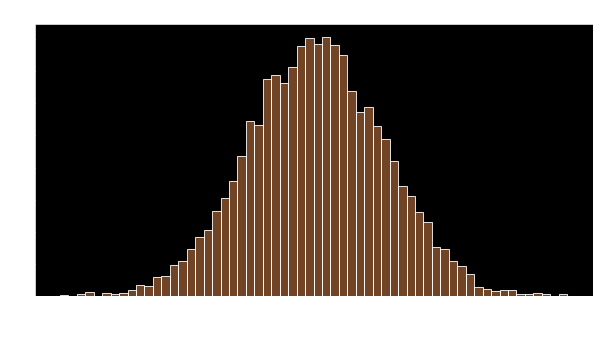

In [12]:
gen_sample_func = lambda N: example_dist.rvs(N)
theta_func = lambda sample: numpy.percentile(sample, 75)

theta_estim_array = get_estim_theta_sample(len(example_sample), gen_sample_func, theta_func, B=10000)
delta = theta_estim_array - theta

pyplot.figure(figsize=(10, 5))
pyplot.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ $\Delta$', fontsize=12)
seaborn.histplot(delta, stat='density', alpha=0.5)
pyplot.xlabel('$\Delta$', fontsize=12)
pyplot.show()

2. –°–ª–µ–¥—É—é—â–∏–º —à–∞–≥–æ–º —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º $\alpha/2, 1 - \alpha/2$ –∫–≤–∞–Ω—Ç–∏–ª–∏ —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $\Delta_{[\alpha/2]}, \Delta_{[1 - \alpha/2]}$. –¢–æ–≥–¥–∞ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –∫–≤–∞–Ω—Ç–∏–ª–µ–π $P(\Delta_{[\alpha/2]} < \widehat{\theta} - \theta < \Delta_{[1 - \alpha/2]}) = 1 - \alpha$.
    - –í —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ —É –Ω–∞—Å –µ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ B, –º—ã –º–æ–∂–µ–º –≤–∑—è—Ç—å –æ—Ü–µ–Ω–∫–∏ –∫–≤–∞–Ω—Ç–∏–ª–µ–π. –ü–æ—ç—Ç–æ–º—É —á–µ–º –±–æ–ª—å—à–µ B, —Ç–µ–º —Ç–æ—á–Ω–µ–µ –ø–æ–ª—É—á–∏—Ç—Å—è –æ—Ü–µ–Ω–∫–∞.
3. $P(\widehat{\theta} - \Delta_{[1 - \alpha/2]} < \theta < \widehat{\theta} - \Delta_{[\alpha/2]}) = 1 - \alpha$. 
    - –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞, $CI = (\widehat{\theta} - \Delta_{[1 - \alpha/2]}, \widehat{\theta} - \Delta_{[\alpha/2]})$

In [13]:
alpha = 0.05
left_delta, right_delta = numpy.quantile(delta, [alpha/2, 1-alpha/2])

left_bound, right_bound = theta_estim - right_delta, theta_estim - left_delta
print(f"–ò—Å—Ç–∏–Ω–Ω–æ–µ theta: {round(theta, 2)}")
print(f"–ü–æ–ª—É—á–µ–Ω–Ω—ã–π CI: ({round(left_bound, 2)}, {round(right_bound, 2)})")

–ò—Å—Ç–∏–Ω–Ω–æ–µ theta: 8.08
–ü–æ–ª—É—á–µ–Ω–Ω—ã–π CI: (8.01, 8.2)


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –∏—Å—Ç–∏–Ω–Ω–æ–µ theta –ø–æ–ø–∞–ª–æ –≤ –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª. –ü–æ–∫–∞, –∫–æ–Ω–µ—á–Ω–æ, –º—ã –Ω–µ –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ —Ç–µ–∫—É—â–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, –Ω–æ –Ω–∞–º —ç—Ç–æ –∏ –Ω–µ –Ω–∞–¥–æ: —ç—Ç–æ –Ω–µ –Ω–∞—à —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π.

–ú—ã –ø–æ—Å—Ç—Ä–æ–∏–ª–∏ –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª —Å —É—á–µ—Ç–æ–º –∑–Ω–∞–Ω–∏—è $\theta$ –∏ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏, –Ω–æ –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ –º—ã –∏—Ö –Ω–µ –∑–Ω–∞–µ–º. –ò —Ç—É—Ç –ø—Ä–∏—Ö–æ–¥–∏—Ç –Ω–∞ –ø–æ–º–æ—â—å –µ—â–µ 1 —Ö–∞–∫.

---

### –ò–¥–µ—è 2: –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–º–µ—Å—Ç–æ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ

–ß—Ç–æ–±—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª, –º—ã –¥–æ–ª–∂–Ω—ã –∫–∞–∫-—Ç–æ –ø–æ–ª—É—á–∏—Ç—å $\Delta_{[\alpha/2]}, \Delta_{[1 - \alpha/2]}$.

–í—Å–ø–æ–º–Ω–∏–º, –∫–∞–∫ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è $\Delta:\ \Delta = \widehat{\theta} - \theta$. –î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –µ–µ –ø–æ—Å—á–∏—Ç–∞—Ç—å, –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ $\theta$ –∏ –∏—Å—Ç–∏–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ $\widehat{\theta}$.

**–ù–æ —á—Ç–æ –µ—Å–ª–∏ –≤–º–µ—Å—Ç–æ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ $\theta$ –∏ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Ö –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è?**

–ß—Ç–æ –∑–¥–µ—Å—å –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è:

- –£ –Ω–∞—Å –µ—Å—Ç—å –∏—Å—Ç–∏–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ `dist` –∏ –∏—Å—Ç–∏–Ω–Ω–∞—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞ $\theta$ —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. 
- –ù–æ –º—ã –∏—Ö –Ω–µ –∑–Ω–∞–µ–º. –¢–∞–∫ –¥–∞–≤–∞–π—Ç–µ –∑–∞–º–µ–Ω–∏–º –∏—Å—Ç–∏–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ò —Ç—ç—Ç—É –≤–æ–∑—å–º–µ–º –∫–∞–∫ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É —ç—Ç–æ–≥–æ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

#### –í—Å–ø–æ–º–Ω–∏–º, —á—Ç–æ —Ç–∞–∫–æ–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –∏ —á–µ–º –æ–Ω–æ —Ö–æ—Ä–æ—à–æ.

–° —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –º—ã –≤—Å—Ç—Ä–µ—á–∞–ª–∏—Å—å, –∫–æ–≥–¥–∞ —Å—Ç—Ä–æ–∏–ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–∏ —Å–æ–≥–ª–∞—Å–∏—è –∏ –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç–∏ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞. –ö–∞–∫ –æ–Ω–æ —Å—Ç—Ä–æ–∏—Ç—Å—è?

0. –ü—É—Å—Ç—å $X_1, ..., X_n$ –≤—ã–±–æ—Ä–∫–∞ –∏–∑ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
1. –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞–≤–Ω–∞ 

$$\widehat{F_n}(x) = \frac{1}{n}\sum_i[X_i \leqslant x]$$

2. –¢–µ–ø–µ—Ä—å –Ω–µ—Å–ª–æ–∂–Ω–æ –ø–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ —á—Ç–æ–±—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≤—ã–±–æ—Ä–∫—É –∏–∑ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –º—ã –¥–æ–ª–∂–Ω—ã –Ω–∞—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞—Ç—å **—Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º** –∏–∑ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –Ω–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É –Ω—É–∂–Ω–æ–≥–æ –Ω–∞–º —Ä–∞–∑–º–µ—Ä–∞.
    - –° –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º –æ–∑–Ω–∞—á–µ—Ç, —á—Ç–æ –∫–∞–∂–¥—ã–π –Ω–æ–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç —Ä–∞–≤–Ω–æ–≤–µ—Ä–æ—è—Ç–Ω–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –∏–∑ –≤—Å–µ—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –∏–∑ —Ç–µ—Ö, —á—Ç–æ –Ω–µ –±—ã–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã —Ä–∞–Ω–µ–µ. –ü—Ä–∏ —ç—Ç–æ–º, –µ—Å–ª–∏ –∫–∞–∫–æ–π-—Ç–æ —ç–ª–µ–º–µ—Ç –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ N —Ä–∞–∑ —á–∞—â–µ –¥—Ä—É–≥–æ–≥–æ, —Ç–æ –≤ –Ω–∞—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –æ–Ω —Ç–∞–∫–∂–µ –±—É–¥–µ—Ç –≤ —Å—Ä–µ–¥–Ω–µ–º –≤—Å—Ç—Ä–µ—á–∞—Ç—å—Å—è –≤ N —Ä–∞–∑ —á–∞—â–µ.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ.

- `numpy.random.choice` &mdash; [—Ñ—É–Ω–∫—Ü–∏—è](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), —Ä–µ—à–∞—é—â–∞—è –Ω–∞ Python —ç—Ç—É –∑–∞–¥–∞—á—É.

In [14]:
X = [2, 3, 4, 2]

# –ù–∞—Å–µ–º–ø–ª–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É —Ä–∞–∑–º–µ—Ä–∞ 10 –∏–∑ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –ø–æ –≤—ã–±–æ—Ä–∫–µ X
emp_dist_X_gen = numpy.random.choice(X, replace=True, size=10)
emp_dist_X_gen

array([2, 2, 3, 2, 2, 4, 2, 2, 4, 4])


–ß–µ–º —Ö–æ—Ä–æ—à–æ —ç–º–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ?
- –¢–µ–º, —á—Ç–æ —É –Ω–µ–≥–æ –≤—Å–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –∏–∑–≤–µ—Å—Ç–Ω—ã.
- –ò –æ–Ω–æ —Å—Ö–æ–¥–∏—Ç—Å—è –∫ –∏—Å—Ç–∏–Ω–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏ (–æ —á–µ–º –º—ã —É–∂–µ –≥–æ–≤–æ—Ä–∏–ª–∏ —Ä–∞–Ω–µ–µ).


–ù–æ –∫–∞–∫–∞—è –±—É–¥–µ—Ç —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞ $\theta$ —É —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è? –û–Ω–∞ –Ω–µ —Ä–∞–≤–Ω–∞ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π $\theta$! –ê –±—É–¥–µ—Ç —Ä–∞–≤–Ω–∞ –æ—Ü–µ–Ω–∫–µ $\widehat{\theta}$ —É –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏. 

–ê –∑–Ω–∞—á–∏—Ç —Ç–µ–ø–µ—Ä—å –º—ã –º–æ–∂–µ–º –ø–æ—Å—á–∏—Ç–∞—Ç—å $\Delta^*$, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í–µ–¥—å –¥–ª—è —ç—Ç–æ–≥–æ –Ω–∞–º –Ω—É–∂–Ω—ã –±—ã–ª–∏:
- `sample_size` (–Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å)
- `gen_sample_func`. –í–º–µ—Å—Ç–æ –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–ø–µ—Ä—å –º—ã –ø–æ–¥—Å—Ç–∞–≤–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ–ª—É—á–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ —Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º.
- `theta_func` (–Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å)
- `B` (–Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å)
- `theta` –ø–æ–º–µ–Ω—è–ª–æ—Å—å –Ω–∞ `theta_estim`

–°—Ä–∞–≤–Ω–∏–º –∫–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –±—ã–ª, —Å –Ω–æ–≤—ã–º –∫–æ–¥–æ–º.

In [15]:
# –ë—ã–ª–æ - —Å—Ç–∞–ª–æ
# gen_sample_func = lambda N: example_dist.rvs(N)
gen_sample_func = lambda N: numpy.random.choice(example_sample, replace=True, size=N)

# theta_func = lambda sample: numpy.percentile(sample, 75)
theta_func = lambda sample: numpy.percentile(sample, 75) # –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å

# theta_estim_array = get_estim_theta_sample(len(example_sample), gen_sample_func, theta_func, B=10000)
theta_estim_asterisk_array = get_estim_theta_sample(len(example_sample), gen_sample_func, theta_func, B=10000)

# delta = theta_estim_array - theta
delta_asterisk = theta_estim_asterisk_array - theta_estim

### –ì–ª–∞–≤–Ω–æ–µ –¥–æ–ø—É—â–µ–Ω–∏–µ bootstrap: $\Delta \approx \Delta^*$.
- –ê –Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏ —ç—Ç–æ –≤–µ—Ä–Ω–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ –∏—Å—Ç–∏–Ω–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.

–î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º —ç—Ç–æ –¥–æ–ø—É—â–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ:

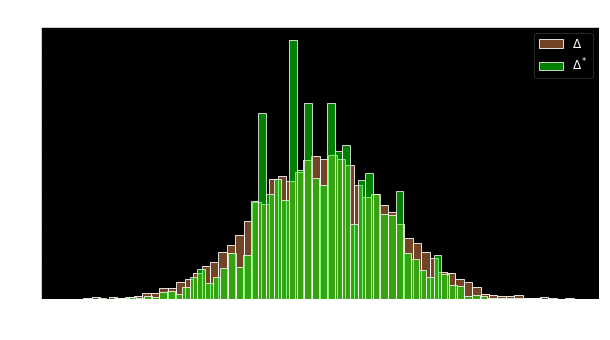

In [16]:
pyplot.figure(figsize=(10, 5))
pyplot.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è $\Delta$ —Å $\Delta^*$', fontsize=12)
seaborn.histplot(delta, stat='density', alpha=0.5, label='$\Delta$')
seaborn.histplot(delta_asterisk, stat='density', alpha=0.5, color='lime', label='$\Delta^*$')
pyplot.legend(fontsize=12)
pyplot.xlabel('$\Delta$', fontsize=12)
pyplot.show()

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ—Ö–æ–∂–∏, —Ö–æ—Ç—å –∏ –Ω–µ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã.

–ù–æ –∏—Å—Ö–æ–¥—è –∏–∑ –Ω–∞—à–µ–≥–æ –¥–æ–ø—É—â–µ–Ω–∏—è –º—ã –º–æ–∂–µ–º –∑–∞–º–µ–Ω–∏—Ç—å 
- $CI = (\widehat{\theta} - \Delta_{[1 - \alpha/2]}, \widehat{\theta} - \Delta_{[\alpha/2]})$ –Ω–∞
- $CI = (\widehat{\theta} - \Delta^*_{[1 - \alpha/2]}, \widehat{\theta} - \Delta^*_{[\alpha/2]})$
    - –ß—Ç–æ —Ç–∞–∫–æ–µ $\Delta^*_i$? –≠—Ç–æ $ \theta^*_i - \widehat{\theta}$, –≥–¥–µ $\theta^*_i$ &mdash; –æ—Ü–µ–Ω–∫–∞ $\widehat{\theta}$, –ø–æ–ª—É—á–µ–Ω–Ω–∞—è –ø–æ i-–æ–π –≤—ã–±–æ—Ä–∫–µ, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∏–∑ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è!
    - –ü–µ—Ä–µ–ø–∏—à–µ–º: $CI = (\widehat{\theta} - \theta^*_{[1 - \alpha/2]} + \widehat{\theta}, \widehat{\theta} - \theta^*_{[\alpha/2]} + \widehat{\theta})$


–ò—Ç–æ–≥–æ: $CI = (2\widehat{\theta} - \theta^*_{[1 - \alpha/2]}, 2\widehat{\theta} - \theta^*_{[\alpha/2]})$. –¢–∞–∫ –∏ —Å—Ç—Ä–æ–∏—Ç—Å—è –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –±—É—Ç—Å—Ç—Ä–∞–ø –∫—Ä–∏—Ç–µ—Ä–∏–π!


**–ì–ª–∞–≤–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –ø–µ—Ä–µ—Ö–æ–¥–∞ –∫ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é:** –≤–∞—à–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ —Ä–∞–≤–Ω–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º—É! –ü–æ—ç—Ç–æ–º—É –≤—Å–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ —Ä–∞–≤–Ω—ã —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ò –æ—á–µ–Ω—å —á–∞—Å—Ç–æ, –∑–∞–±—ã–≤–∞—è –ø—Ä–æ —ç—Ç–æ, –≤—ã –º–æ–∂–µ—Ç–µ –Ω–∞—á–∞—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±—É—Ç—Å—Ç—Ä–∞–ø –Ω–µ–≤–µ—Ä–Ω–æ!

In [17]:
alpha = 0.05
left_theta_asterisk, right_theta_asterisk = numpy.quantile(theta_estim_asterisk_array, [alpha/2, 1-alpha/2])

left_bound, right_bound = 2 * theta_estim - right_theta_asterisk, 2 * theta_estim - left_theta_asterisk
print(f"–ò—Å—Ç–∏–Ω–Ω–æ–µ theta: {round(theta, 2)}")
print(f"–ü–æ–ª—É—á–µ–Ω–Ω—ã–π CI: ({round(left_bound, 2)}, {round(right_bound, 2)})")

–ò—Å—Ç–∏–Ω–Ω–æ–µ theta: 8.08
–ü–æ–ª—É—á–µ–Ω–Ω—ã–π CI: (8.02, 8.19)


–î–∞–≤–∞–π—Ç–µ –Ω–∞–ø–∏—à–µ–º —Ç–µ–ø–µ—Ä—å –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∫–æ–¥ –±—É—Ç—Å—Ç—Ä–∞–ø-–∫—Ä–∏—Ç–µ—Ä–∏—è. –ß—Ç–æ –º—ã —Å–¥–µ–ª–∞–ª–∏ –ø–æ —à–∞–≥–∞–º:

1. –°—á–∏—Ç–∞–µ–º $\widehat{\theta}$ –ø–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
2. –ù–∞–ø–∏—Å–∞–ª–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏—é –≤—ã–±–æ—Ä–æ–∫ –∏–∑ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: `lambda N: numpy.random.choice(example_sample, replace=True, size=N)`. 
3. –ù–∞–ø–∏—Å–∞–ª–∏ —Ñ—É–Ω–∫—Ü–∏—é –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ $\theta^*$ (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–≤ –ª–æ–≥–∏–∫—É –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ).
    - –í—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã –≤–Ω—É—Ç—Ä–∏ —ç—Ç–æ–≥–æ —à–∞–≥–∞ –≤ —Ü–∏–∫–ª–µ —Å –ø–æ–º–æ—â—å—é —à–∞–≥–∞ 1, –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è **–±—É—Ç—Å—Ç—Ä–∞–ø** –≤—ã–±–æ—Ä–∫–∞–º–∏.
4. –°—á–∏—Ç–∞–µ–º –ª–µ–≤—ã–π –∏ –ø—Ä–∞–≤—ã–π –∫–≤–∞–Ω—Ç–∏–ª–∏ $\theta^*_{[\alpha/2]}, \theta^*_{[1 - \alpha/2]}$.
5. –°—á–∏—Ç–∞–µ–º $CI = (2\widehat{\theta} - \theta^*_{[1 - \alpha/2]}, 2\widehat{\theta} - \theta^*_{[\alpha/2]})$.

In [18]:
def raw_bootstrap(sample, theta_func, alpha = 0.05):
    B = 10000
    
    theta_estim = theta_func(sample)
    gen_sample_func = lambda N: numpy.random.choice(sample, replace=True, size=N)
    
    theta_estim_asterisk_array = get_estim_theta_sample(len(example_sample), gen_sample_func, theta_func, B)
    left_theta_asterisk, right_theta_asterisk = numpy.quantile(theta_estim_asterisk_array, [alpha/2, 1-alpha/2])
    left_bound, right_bound = 2 * theta_estim - right_theta_asterisk, 2 * theta_estim - left_theta_asterisk

    return left_bound, right_bound

–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å:

In [19]:
numpy.random.seed(42)
N = 20000
example_dist = stats.gamma(a=2, scale=3)
example_sample = example_dist.rvs(N)

theta_func = lambda sample: numpy.percentile(sample, 75)
raw_bootstrap(example_sample, theta_func, alpha = 0.05)

(8.020543156899208, 8.194299412190123)

–î–∞, –≤—Å–µ –æ—Ç–ª–∏—á–Ω–æ!

## –ë–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º –±—É—Ç—Å—Ç—Ä–∞–ø–∞

–î–∞–≤–∞–π—Ç–µ —á—É—Ç—å —É–ø—Ä–æ—Å—Ç–∏–º —à–∞–≥–∏:

1. –°—á–∏—Ç–∞–µ–º $\widehat{\theta}$ –ø–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
2. –í —Ü–∏–∫–ª–µ —Ä–∞–∑–º–µ—Ä–∞ `B`:
    1. –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É —Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º –∏–∑ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏. –†–∞–∑–º–µ—Ä `N` &mdash; –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏.  –≠—Ç–∞ –≤—ã–±–æ—Ä–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **–±—É—Ç—Å—Ç—Ä–∞–ø –≤—ã–±–æ—Ä–∫–æ–π**.
    2. –°—á–∏—Ç–∞–µ–º –ø–æ —ç—Ç–æ–π –≤—ã–±–æ—Ä–∫–µ $\theta^*_i$ —Ç–æ—á–Ω–æ —Ç–∞–∫–∂–µ, –∫–∞–∫ —Å—á–∏—Ç–∞–µ–º $\widehat{\theta}$ –ø–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
3. –°–æ—Ö—Ä–∞–Ω—è–µ–º $\theta^*_1,\ ...,\ \theta^*_B$ –≤ –º–∞—Å—Å–∏–≤.
4. –°—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª:
    1. –°—á–∏—Ç–∞–µ–º –ª–µ–≤—ã–π –∏ –ø—Ä–∞–≤—ã–π –∫–≤–∞–Ω—Ç–∏–ª–∏ $\theta^*_{[\alpha/2]}, \theta^*_{[1 - \alpha/2]}$.
    2. $CI = (2\widehat{\theta} - \theta^*_{[1 - \alpha/2]}, 2\widehat{\theta} - \theta^*_{[\alpha/2]})$.

In [38]:
def bootstrap_ci(sample, theta_func, alpha=0.05):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ —á–µ—Ä–µ–∑ –±—É—Ç—Å—Ç—Ä–∞–ø
        
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - sample: –∏–∑–Ω–∞—á–∞–ª—å–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞
            - theta_func: —Ñ—É–Ω–∫—Ü–∏—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –æ—Ü–µ–Ω–∫–∏ theta –ø–æ –≤—ã–±–æ—Ä–∫–µ.
                - –ù–∞–ø—Ä–∏–º–µ—Ä, lambda sample: numpy.percentile(sample, 75)
            - alpha: —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è. –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –±—É–¥–µ—Ç —à–∏—Ä–∏–Ω—ã 1-alpha.
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
            - –ª–µ–≤—É—é –∏ –ø—Ä–∞–≤—É—é –≥—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.
    """
    
    B = 2000 # –ß—Ç–æ–±—ã —É—Å–∫–æ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É
    N = len(sample)
    theta_estim = theta_func(sample)
    
    theta_asterisk_array = []
    for _ in range(B):
        bootstrap_sample = numpy.random.choice(sample, replace=True, size=N)
        theta_asterisk = theta_func(bootstrap_sample)
        theta_asterisk_array.append(theta_asterisk)
    left_theta_asterisk, right_theta_asterisk = numpy.quantile(theta_asterisk_array, [alpha/2, 1-alpha/2])
    left_bound, right_bound = 2 * theta_estim - right_theta_asterisk, 2 * theta_estim - left_theta_asterisk

    return left_bound, right_bound

In [39]:
%%time
theta_func = lambda sample: numpy.percentile(sample, 75) 
bootstrap_ci(sample, theta_func, alpha=0.05)

CPU times: user 238 ms, sys: 0 ns, total: 238 ms
Wall time: 237 ms


(4.383626630619778, 4.851248249100453)

–ö–æ–¥ —Ä–∞–±–æ—á–∏–π, –Ω–æ —É –Ω–µ–≥–æ –µ—Å—Ç—å –º–∏–Ω—É—Å: –æ–Ω –æ—á–µ–Ω—å –¥–æ–ª–≥–∏–π. –ü–æ—ç—Ç–æ–º—É, —á—Ç–æ–±—ã —É—Å–∫–æ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É, –¥–∞–≤–∞–π—Ç–µ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–µ 1, –∞ —Å—Ä–∞–∑—É `batch_size` –≤—ã–±–æ—Ä–æ–∫, —á—Ç–æ–±—ã —É—Å–∫–æ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É.

–ü—Ä–∏ —ç—Ç–æ–º, –ø—Ä–∏–¥–µ—Ç—Å—è –ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é `theta_func`, —á—Ç–æ–±—ã –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–ª–∞ —Å –º–∞—Å—Å–∏–≤–æ–º.

In [40]:
theta_func = lambda sample: numpy.percentile(sample, 75, axis=1) 

def fast_bootstrap_ci(sample, theta_func, alpha=0.05):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ —á–µ—Ä–µ–∑ –±—É—Ç—Å—Ç—Ä–∞–ø
        
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - sample: –∏–∑–Ω–∞—á–∞–ª—å–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞
            - theta_func: —Ñ—É–Ω–∫—Ü–∏—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –æ—Ü–µ–Ω–∫–∏ theta –ø–æ –≤—ã–±–æ—Ä–∫–µ.
                - –ù–∞–ø—Ä–∏–º–µ—Ä, lambda sample: numpy.percentile(sample, 75)
            - alpha: —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è. –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –±—É–¥–µ—Ç —à–∏—Ä–∏–Ω—ã 1-alpha.
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
            - –ª–µ–≤—É—é –∏ –ø—Ä–∞–≤—É—é –≥—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.
    """
    
    B = 2000 # –ß—Ç–æ–±—ã —É—Å–∫–æ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É
    batch_size = B // 20
    N = len(sample)
    # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –∫ –≤—ã–±–æ—Ä–∫–µ, —á—Ç–æ–±—ã —Ä–∞–±–æ—Ç–∞—Ç—å —Å –º–∞—Å—Å–∏–≤–æ–º –º–∞—Å—Å–∏–≤–æ–≤.
    theta_estim = theta_func(numpy.expand_dims(sample, axis=0)).ravel()
    assert len(theta_estim) == 1
    theta_estim = theta_estim[0]
    
    theta_asterisk_array = []
    for _ in range(0, B, batch_size):
        # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Å—Ä–∞–∑—É batch_size –≤—ã–±–æ—Ä–æ–∫
        bootstrap_sample = numpy.random.choice(sample, replace=True, size=(batch_size, N))
        theta_asterisk = theta_func(bootstrap_sample).ravel()
        assert len(theta_asterisk) == batch_size
        theta_asterisk_array = numpy.concatenate([theta_asterisk_array, theta_asterisk])
    left_theta_asterisk, right_theta_asterisk = numpy.quantile(theta_asterisk_array, [alpha/2, 1-alpha/2])
    left_bound, right_bound = 2 * theta_estim - right_theta_asterisk, 2 * theta_estim - left_theta_asterisk

    return left_bound, right_bound

In [41]:
%%time
theta_func = lambda sample: numpy.percentile(sample, 75, axis=1) 
fast_bootstrap_ci(sample, theta_func, alpha=0.05)

CPU times: user 40.7 ms, sys: 0 ns, total: 40.7 ms
Wall time: 39.9 ms


(4.383626630619778, 4.87087359274933)

–†–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ –∏–∑–º–µ–Ω–∏–ª—Å—è, –Ω–æ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã —Å–æ–∫—Ä–∞—Ç–∏–ª–æ—Å—å –≤ 6 —Ä–∞–∑!

–ê —Ç–µ–ø–µ—Ä—å —Å–∞–º–æ–µ –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞—à –±—É—Ç—Å—Ç—Ä–∞–ø –∫—Ä–∏—Ç–µ—Ä–∏–π! –ò —Å–Ω–æ–≤–∞ —Å –ø–æ–º–æ—â—å—é –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ.

In [37]:
numpy.random.seed(42)

bad_cnt = 0
MC_size = 1000
N = 5000
alpha=0.05
theta = example_dist.ppf(0.75)
theta_func = lambda sample: numpy.percentile(sample, 75, axis=1) 


for i in tqdm(range(MC_size)):
    # –ì–µ–Ω–µ—Ä–∏—Ä—É—é –≤—ã–±–æ—Ä–∫—É —Ç–µ—Å—Ç–∞ –∏ –∫–æ–Ω—Ç—Ä–æ–ª—è
    ex_sample = example_dist.rvs(N)

    left, right = fast_bootstrap_ci(ex_sample, theta_func, alpha=0.05)
    
    bad_cnt += 1 - (left < theta < right)


print(f"FPR: {round(bad_cnt / MC_size, 4)}")
print(f"CI={proportion_confint(count = bad_cnt, nobs = MC_size, alpha=0.05, method='wilson')}")

  0%|          | 0/1000 [00:00<?, ?it/s]

FPR: 0.056
CI=(0.043374813385441996, 0.07202334814973096)


–í–∏–¥–∏–º, —á—Ç–æ –∫—Ä–∏—Ç–µ—Ä–∏–π —Ä–∞–±–æ—Ç–∞–µ—Ç –≤–∞–ª–∏–¥–Ω–æ (—Ö–æ—Ç—å –∏ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ), –ø–æ—ç—Ç–æ–º—É —Ç–µ–ø–µ—Ä—å —Å–∞–º–æ–µ –≤—Ä–µ–º—è —Ä–µ—à–∏—Ç—å –∏–∑–Ω–∞—á–∞–ª—å–Ω—É—é –∑–∞–¥–∞—á—É!

In [42]:
sample = numpy.load('bootstrap_example_1.npy')
fast_bootstrap_ci(sample, theta_func, alpha=0.05)

(4.392414326845837, 4.864705982389839)

–î–∞, –æ—Ç–ª–∏—á–Ω–æ! –ú—ã —Å–º–æ–≥–ª–∏ –ø–æ—Å—á–∏—Ç–∞—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª.

### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –∏—Ç–æ–≥–∏ –ø—Ä–æ –±—É—Ç—Å—Ç—Ä–∞–ø

–ë—É—Ç—Å—Ç—Ä–∞–ø &mdash; —Å–ø–æ—Å–æ–± –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –¥–ª—è –ª—é–±–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Å–æ—Å—Ç–æ—è—â–∏–π –∏–∑ 2 —ç–≤—Ä–∏—Å—Ç–∏–∫: 
- –ó–∞–º–µ–Ω—ã –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ
- –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏—Ç–æ–≥–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ $\theta^*$ —Å –ø–æ–º–æ—â—å—é –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, —á—Ç–æ–±—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –∫–≤–∞–Ω—Ç–∏–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–≠—Ç–æ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–ø–æ—Å–æ–± –ø–æ—Å—á–∏—Ç–∞—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –ª—é–±—ã—Ö –Ω–µ—Ç—Ä–∏–≤–∏–∞–ª—å–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∏ –ª—é–±—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π. –ò —á–∞—Å—Ç–æ –º–æ–∂–µ—Ç –ø—Ä–∏–≥–æ–¥–∏—Ç—å—Å—è –≤ —Ä–∞–±–æ—Ç–µ, –ø–æ—ç—Ç–æ–º—É –≤—ã –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –¥–æ–ª–∂–Ω—ã –ø–æ–º–Ω–∏—Ç—å –ø—Ä–æ –Ω–µ–≥–æ.

----

## –û—Å–Ω–æ–≤–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã –ø—Ä–æ –±—É—Ç—Å—Ç—Ä–∞–ø:

1. –ö–æ–≥–¥–∞ –±—É—Ç—Å—Ç—Ä–∞–ø —Ä–∞–±–æ—Ç–∞–µ—Ç?
    - –ö–æ–≥–¥–∞ –≤—ã–±–æ—Ä–∫–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∏–µ. –û–±–µ —ç–≤—Ä–∏—Å—Ç–∏–∫–∏, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ—Å—Ç–æ–∏—Ç –±—É—Å—Ç—Ä–∞–ø, —Ä–∞–±–æ—Ç–∞—é—Ç –µ—Å–ª–∏:
        - $N$ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–µ. –¢–æ–≥–¥–∞ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª—É—á—à–µ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –∏—Å—Ç–∏–Ω–Ω–æ–º—É –∏ –º—ã —Ç–æ—á–Ω–µ–µ –æ—Ü–µ–Ω–∏–≤–∞–µ–º $\Delta^*$.
        - $B$ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–µ. –¢–∞–∫ –º—ã —Ç–æ—á–Ω–µ–µ –ø–æ—Å—Ç—Ä–æ–∏–º –∫–≤–∞–Ω—Ç–∏–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\Delta^*$.
        - –ü–µ—Ä–≤—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –º—ã –Ω–µ –≤—Å–µ–≥–¥–∞ –º–æ–∂–µ–º —É–ø—Ä–∞–≤–ª—è—Ç—å, –∞ –≤—Ç–æ—Ä—ã–º –≤—Å–µ–≥–¥–∞.
2. –ú–æ–∂–Ω–æ –ª–∏ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –±—É—Ç—Å—Ç—Ä–∞–ø –≤—ã–±–æ—Ä–∫–∏ –¥—Ä—É–≥–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞, –Ω–µ–∂–µ–ª–∏ $N$?
    - –ù–µ—Ç, –Ω–µ–ª—å–∑—è. –≠—Ç–æ —Å–ª–µ–¥—É–µ—Ç –∏–∑ —à–∞–≥–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, –≥–¥–µ –º—ã –ø—ã—Ç–∞–µ–º—Å—è –æ—Ü–µ–Ω–∏—Ç—å $\widehat{\theta} - \theta$, –∞ $\widehat{\theta}$ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –ø–æ –≤—ã–±–æ—Ä–∫–µ —Ä–∞–∑–º–µ—Ä–∞ N.
3. –ö–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ —Å—Ç—Ä–æ–∏—Ç –±—Ä–∞—Ç—å `B`?
    - –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: `B = 10000`.
    - –ú–æ–∂–Ω–æ –ª–∏ –±—Ä–∞—Ç—å –º–µ–Ω—å—à–µ–≥–æ —Ä–∞–∑–º–µ—Ä–∞? –î–∞, –Ω–æ –Ω–∞–¥–æ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–∞–∫ –º—ã —Å–¥–µ–ª–∞–ª–∏ –≤ –ø—Ä–∏–º–µ—Ä–µ –≤—ã—à–µ.


  
### –î–≤—É–≤—ã–±–æ—Ä–æ—á–Ω—ã–π –±—É—Ç—Å—Ç—Ä–∞–ø

–ö–∞–∫ —Å –ø–æ–º–æ—â—å—é –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ 2 —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π? –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–¥–∏–∞–Ω –≤ —Ç–µ—Å—Ç–µ –∏ –≤ –∫–æ–Ω—Ç—Ä–æ–ª–µ? –î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–¥–æ –ø–æ–≤—Ç–æ—Ä–∏—Ç—å –≤—Å–µ —Ç–µ –∂–µ —à–∞–≥–∏, —á—Ç–æ –∏ –¥–ª—è –æ–¥–Ω–æ–≤—ã–±–æ—Ä–æ—á–Ω–æ–≥–æ –±—É—Ç—Å—Ç—Ä–∞–ø–∞, –Ω–æ —Å –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–µ–π: –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–µ 1, –∞ 2 –≤—ã–±–æ—Ä–∫–∏ —Å—Ä–∞–∑—É.

–ü—É—Å—Ç—å —É –≤–∞—Å –µ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ $X,\ Y$ —Ä–∞–∑–º–µ—Ä–∞ $N, M$ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ. –¢–æ–≥–¥–∞:

1. –°—á–∏—Ç–∞–µ–º $\widehat{\theta_X}, \widehat{\theta_Y}$ –ø–æ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ. –°—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∏–º–∏ $\widehat{\theta} = \widehat{\theta_X} - \widehat{\theta_Y}$.
2. –í —Ü–∏–∫–ª–µ —Ä–∞–∑–º–µ—Ä–∞ `B`:
    1. –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏–∑ –≤—ã–±–æ—Ä–æ–∫ `X` –∏ `Y` –Ω–æ–≤—ã–µ –≤—ã–±–æ—Ä–∫–∏ —Å –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ–º —Ä–∞–∑–º–µ—Ä–∞ `N` –∏ `M` —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. 
    2. –°—á–∏—Ç–∞–µ–º –ø–æ —ç—Ç–∏–º –≤—ã–±–æ—Ä–∫–∞–º $\theta^*_{X, i},\ \theta^*_{Y, i}$. $\theta^*_{i} = \theta^*_{X, i} - \theta^*_{Y, i}$
3. –°–æ—Ö—Ä–∞–Ω—è–µ–º $\theta^*_1,\ ...,\ \theta^*_B$ –≤ –º–∞—Å—Å–∏–≤.
4. –°—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –ø–æ —Ñ–æ—Ä–º—É–ª–µ –≤—ã—à–µ.

Profit!
    
    
-----



## –í–∏–¥—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –≤ –±—É—Ç—Å—Ç—Ä–∞–ø–µ

–£ –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –µ—Å—Ç—å 3 –≤–∏–¥–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤.

1. –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π: $CI = (2\widehat{\theta} - \theta^*_{[1 - \alpha/2]}, 2\widehat{\theta} - \theta^*_{[\alpha/2]})$. –ï–≥–æ –º—ã —É–∂–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏.
2. –ù–æ—Ä–º–∞–ª—å–Ω—ã–π: $CI = (\widehat{\theta} \pm z_{1-\alpha/2}\cdot \sqrt{S^2_{\theta^*}})$
    - –ï—Å–ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $\widehat{\theta}$ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ (—á—Ç–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ–≥–¥–∞ —Ç–∞–∫), —Ç–æ –º—ã –º–æ–∂–µ–º –ø–æ—Å—á–∏—Ç–∞—Ç—å –ø–æ –≤—ã–±–æ—Ä–∫–µ $\theta^*$ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ $\sqrt{S^2_{\theta^*}}$. –º—ã –¥–µ–ª–∞–µ–º –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ $\sqrt{S^2_{\theta^*}} \approx \sqrt{S^2_{\widehat{\theta}}}$ . –¢–æ–≥–¥–∞ —Ü–µ–Ω—Ç—Ä —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\theta$ –±—É–¥–µ—Ç –ª–µ–∂–∞—Ç—å –≤ –¥–∞–Ω–Ω–æ–º –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ.
    
3. –ü—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å–Ω—ã–π: $CI = (\theta^*_{[\alpha/2]}, \theta^*_{[1 - \alpha/2]})$
    - –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –æ–Ω —Ä–∞–±–æ—Ç–∞–µ—Ç, –µ—Å–ª–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –º–æ–Ω–æ—Ç–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è $F$, —Ç–∞–∫–∞—è, —á—Ç–æ $U = F(X)$ –∏ $U \sim \mathcal{N}(\varphi, c^2)$, –≥–¥–µ $\varphi = F(\theta)$. –ì–¥–µ $X$ &mdash; –≤—ã–±–æ—Ä–∫–∞, U &mdash; –æ–¥–Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞.
    - –î–æ–∫-–≤–æ:
        - –ü—É—Å—Ç—å $U^*_i = F(\theta^*_i)$, –∞ $u^*_{[\beta]}$ &mdash; $\beta$ –æ—Ü–µ–Ω–∫–∞ –∫–≤–∞–Ω—Ç–∏–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $U^*$. –¢–æ–≥–¥–∞ –ø–æ —Å–≤–æ–π—Å—Ç–≤—É –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ—Å—Ç–∏ $F: u^*_{[\beta]} = F(\theta^*_{[\beta]})$.
        - –û—Ü–µ–Ω–∫–∏ –¥–ª—è –∫–≤–∞–Ω—Ç–∏–ª–µ–π, –µ—Å–ª–∏ –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ 1 —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ $U$, —Ä–∞–≤–Ω—ã $\widehat{u_{[\alpha/2]}} = U - z_{1 - \alpha/2}c$.
        - –ü—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –±—É—Ç—Å—Ç—Ä–∞–ø–∞: $u^*_{[\beta]} \approx \widehat{u_{[\beta]}}$.
        - $$\begin{align}
            P(\theta^*_{[\alpha/2]} < \theta < \theta^*_{[1 - \alpha/2]}) &=  P(F(\theta^*_{[\alpha/2]}) < F(\theta) < F(\theta^*_{[1 - \alpha/2]})) \\
            &= P(u^*_{[\alpha/2]} < \varphi < u^*_{[1 - \alpha/2]})) \\
            &\approx P(\widehat{u_{\alpha/2}} < \phi < \widehat{u_{1 - \alpha/2}} )) \\
            &= P(U - cz_{1 - \alpha/2} < \varphi < U + cz_{1 - \alpha/2})) \\
            &= P(- z_{1 - \alpha/2} < \dfrac{U - \varphi}{c} < z_{1 - \alpha/2}) \\
            &= 1 - \alpha
        \end{align}
        $$
     - **–ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª —Ä–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ–≥–¥–∞.**
    
### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø–æ—Ö–æ–∂–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–Ω–∏ –¥–∞—é—Ç. 

In [43]:
def fast_bootstrap_ci(sample, theta_func, alpha=0.05):
    
    B = 1000 # –ß—Ç–æ–±—ã —É—Å–∫–æ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É
    batch_size = B // 20
    N = len(sample)
    
    # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –∫ –≤—ã–±–æ—Ä–∫–µ, —á—Ç–æ–±—ã —Ä–∞–±–æ—Ç–∞—Ç—å —Å –º–∞—Å—Å–∏–≤–æ–º –º–∞—Å—Å–∏–≤–æ–≤.
    theta_estim = theta_func(numpy.expand_dims(sample, axis=0)).ravel()
    assert len(theta_estim) == 1
    theta_estim = theta_estim[0]
    
    theta_asterisk_array = []
    for _ in range(0, B, batch_size):
        # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Å—Ä–∞–∑—É batch_size –≤—ã–±–æ—Ä–æ–∫
        bootstrap_sample = numpy.random.choice(sample, replace=True, size=(batch_size, N))
        theta_asterisk = theta_func(bootstrap_sample).ravel()
        assert len(theta_asterisk) == batch_size
        theta_asterisk_array = numpy.concatenate([theta_asterisk_array, theta_asterisk])
    left_theta_asterisk, right_theta_asterisk = numpy.quantile(theta_asterisk_array, [alpha/2, 1-alpha/2])
    std = numpy.std(theta_asterisk_array)
    
    
    central_left_bound, central_right_bound = 2 * theta_estim - right_theta_asterisk, 2 * theta_estim - left_theta_asterisk
    percentile_left_bound, percentile_right_bound = left_theta_asterisk, right_theta_asterisk
    norm_left_bound, norm_right_bound = theta_estim - norm().ppf(1-alpha/2) * std, theta_estim + norm().ppf(1-alpha/2) * std

    return {
        'central bootstrap': (central_left_bound, central_right_bound),
        'percentile bootstrap': (percentile_left_bound, percentile_right_bound),
        'norm bootstrap': (norm_left_bound, norm_right_bound)
    }

–ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã —á–µ—Ä–µ–∑ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ. FPR –±—É–¥–µ—Ç –æ—Ç—Ä–∞–∂–∞—Ç—å, –≤ —Å–∫–æ–ª—å–∫–∏—Ö –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö —Å–ª—É—á–∞–µ–≤ –∏—Å—Ç–∏–Ω–Ω–æ–µ $\theta$ –Ω–µ –ø–æ–ø–∞–ª –≤ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª.

In [44]:
def mc_result_dict_creator(bad_cnt, MC_size):
    # –°–æ–∑–¥–∞–µ—Ç —Å–ª–æ–≤–∞—Ä—å, –≤ –∫–æ—Ç–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—Ç—Å—è —Å–ª–æ–≤–∞—Ä–µ–º
    mc_result = defaultdict(dict)
    for method in bad_cnt:
        fpr = bad_cnt[method] / MC_size
        left_fpr, right_fpr = proportion_confint(count = bad_cnt[method], nobs = MC_size, alpha=0.05, method='wilson')
        mc_result[method]['FPR'] = fpr
        mc_result[method]['FPR, left_bound'] = left_fpr
        mc_result[method]['FPR, right_bound'] = right_fpr
    return mc_result

def mc_bootstrap_checker(N, example_dist, theta, theta_func, alpha=0.05, MC_size = 1000):
    numpy.random.seed(42)
    
    # –°–æ–∑–¥–∞–µ—Ç —Å–ª–æ–≤–∞—Ä—å, –≤ –∫–æ—Ç–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—Ç—Å—è 0
    bad_cnt = defaultdict(lambda: 0)
    for i in range(MC_size):
        ex_sample = example_dist.rvs(N)

        curr_res = fast_bootstrap_ci(ex_sample, theta_func, alpha=alpha)

        for ci_type in curr_res:
            left, right = curr_res[ci_type]
            bad_cnt[ci_type] += 1 - (left < theta < right)
    
    return mc_result_dict_creator(bad_cnt, MC_size)


In [45]:
N_to_check = [50, 100, 500, 1000, 2000, 5000]

example_dist = stats.expon(scale=5)
theta = example_dist.ppf(0.5)
theta_func = lambda sample: numpy.percentile(sample, 50, axis=1) 

final_results = {}
for N in tqdm(N_to_check):
    final_results[N] = mc_bootstrap_checker(N, example_dist, theta, theta_func, alpha=0.05, MC_size = 1000)

  0%|          | 0/6 [00:00<?, ?it/s]

In [46]:
def show_FPR(result_dict, methods, colors):
    pyplot.figure(figsize=(18.5, 8))
    pyplot.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å FPR –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤', fontsize=15)
    N_array = list(result_dict.keys())
    x_ticks = numpy.arange(0, len(N_array))

    pyplot.hlines(0.05, x_ticks[0], x_ticks[-1], 
                   color='red', linestyle='-', label="$\\alpha$")
    for method, color in zip(methods, colors):
        FPR = []
        left_bound = []
        right_bound = []
        for N in result_dict:
            curr_dict = result_dict[N][method]
            FPR.append(curr_dict['FPR'])
            left_bound.append(curr_dict['FPR, left_bound'])
            right_bound.append(curr_dict['FPR, right_bound'])

        pyplot.plot(x_ticks, FPR, color=color, label=method)
        pyplot.fill_between(x_ticks, left_bound, right_bound, 
                   color=color, alpha=0.2)

    pyplot.legend(fontsize=15)
    pyplot.xticks(x_ticks, N_array)
    pyplot.xlabel('N', fontsize=15)
    pyplot.ylabel('FPR', fontsize=15)
    pyplot.grid(linewidth=0.2)

    pyplot.show()

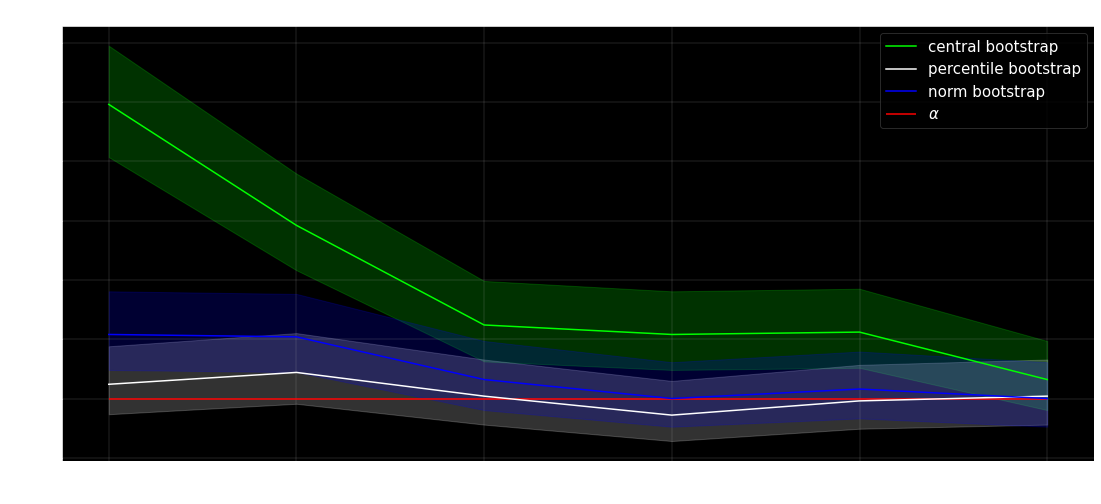

In [47]:
colors = ['lime', 'white', 'blue']
methods = ['central bootstrap', 'percentile bootstrap', 'norm bootstrap']
show_FPR(final_results, methods, colors)

–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö –≤—ã–≤–æ–¥–æ–≤:
1) –ù–∞ 5000 –≤—Å–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º–∏: FPR –≤–µ–∑–¥–µ —Ä–∞–≤–µ–Ω 5% —Å —É—á–µ—Ç–æ–º —à—É–º–∞.
2) –£–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, –Ω–æ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —Å—Ö–æ–¥–∏—Ç—Å—è –Ω–∞–º–Ω–æ–≥–æ –¥–æ–ª—å—à–µ, —á–µ–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è 2 –≤–∏–¥–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤. –ü–æ—ç—Ç–æ–º—É, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è –±–∞–∑–∞ —É –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å–Ω–æ–≥–æ –±—É—Ç—Å—Ç—Ä–∞–ø–∞ —Ö—É–∂–µ, —Ä–µ–∫–æ–º–µ–Ω–¥—É—é—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏–º–µ–Ω–Ω–æ –µ–≥–æ.
    
---- 

–î–∞–≤–∞–π—Ç–µ —Ç–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø–æ—Ö–æ–∂–∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –Ω–∞ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö:

In [48]:
theta_func = lambda sample: numpy.percentile(sample, 50, axis=1) 
ex_sample = example_dist.rvs(5000)
result = fast_bootstrap_ci(ex_sample, theta_func, alpha=0.05)

for ci_type in result:
    left, right = result[ci_type]
    print(f"{ci_type} interval: ({round(left, 2)}. {round(right, 2)})")

central bootstrap interval: (3.32. 3.54)
percentile bootstrap interval: (3.34. 3.56)
norm bootstrap interval: (3.32. 3.56)


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤—Å–µ –æ–Ω–∏ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏ –∏ —Å–∏–ª—å–Ω–æ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è. –ê –µ—Å–ª–∏ –≤–∑—è—Ç—å –±–æ–ª—å—à–µ –≤—ã–±–æ—Ä–∫—É?

In [49]:
ex_sample = example_dist.rvs(50000)
result = fast_bootstrap_ci(ex_sample, theta_func, alpha=0.05)

for ci_type in result:
    left, right = result[ci_type]
    print(f"{ci_type} interval: ({round(left, 2)}. {round(right, 2)})")

central bootstrap interval: (3.39. 3.48)
percentile bootstrap interval: (3.4. 3.49)
norm bootstrap interval: (3.4. 3.48)


–ó–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–æ–≤–ø–∞–ª–∏! –û—Ç—Å—é–¥–∞ –º–æ–∂–Ω–æ —Ç–∞–∫–∂–µ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –º–æ—â–Ω–æ—Å—Ç—å –≤—Å–µ—Ö 3 –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤–∞ –Ω–∞ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.

## T-test vs. Bootstrap

–ú—ã —É–∂–µ –ø–æ–Ω—è–ª–∏, —á—Ç–æ —Å –ø–æ–º–æ—â—å—é –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –º—ã –º–æ–∂–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –ª—é–±—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–∏–µ. –ú—ã —Ç–∞–∫–∂–µ –∑–Ω–∞–µ–º, —á—Ç–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –¥–ª—è –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—è —Å—É—â–µ—Å—Ç–≤—É–µ—Ç t-test. –í –¥–∞–Ω–Ω–æ–º –ø–∞—Ä–∞–≥—Ä–∞—Ñ–µ –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –∫–∞–∫–∏–µ-—Ç–æ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ —É –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ t-test?

–ú—ã –æ—Ç–≤–µ—Ç–∏–º –Ω–∞ 3 –≤–æ–ø—Ä–æ—Å–∞:
- –º–æ–∂–µ—Ç –ª–∏ –ø–æ–º–æ—á—å bootstrap, –∫–æ–≥–¥–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç t-test?
- –º–æ—â–Ω–µ–µ –ª–∏ bootstrap, —á–µ–º t-test?
- –Ω–∞—Å–∫–æ–ª—å–∫–æ –±—ã—Å—Ç—Ä–µ–µ –æ–¥–∏–Ω –∫—Ä–∏—Ç–µ—Ä–∏–π, —á–µ–º –¥—Ä—É–≥–æ–π?

–î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ–¥–µ–º —Ç–æ—Ç –∂–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø—Ä–æ–≤–µ–ª–∏ —Ä–∞–Ω–µ–µ, —Å—Ä–∞–≤–Ω–∏–≤–∞—è –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã, –Ω–æ —Å–æ —Å—Ä–µ–¥–Ω–∏–º.

In [50]:
def mc_ttest_checker(N, example_dist, theta, alpha=0.05, MC_size = 1000):
    numpy.random.seed(42)
    
    bad_cnt = defaultdict(lambda: 0)
    for i in range(MC_size):
        ex_sample = example_dist.rvs(N)

        ttest_pval = ttest_1samp(ex_sample, popmean=theta).pvalue
        bad_cnt['ttest'] += (ttest_pval < alpha)
    
    return mc_result_dict_creator(bad_cnt, MC_size)


In [51]:
N_to_check = [5, 10, 20, 50, 100, 200, 500, 1000]

example_dist = stats.expon(scale=5)
theta = example_dist.mean()
theta_func = lambda sample: numpy.mean(sample, axis=1) 

boot_results = {}
ttest_results = {}
final_results = {}
for N in tqdm(N_to_check):
    boot_results = mc_bootstrap_checker(N, example_dist, theta, theta_func, alpha=0.05, MC_size = 1000)
    ttest_results = mc_ttest_checker(N, example_dist, theta, alpha=0.05, MC_size = 1000)
    final_results[N] = dict(boot_results, **ttest_results)

  0%|          | 0/8 [00:00<?, ?it/s]

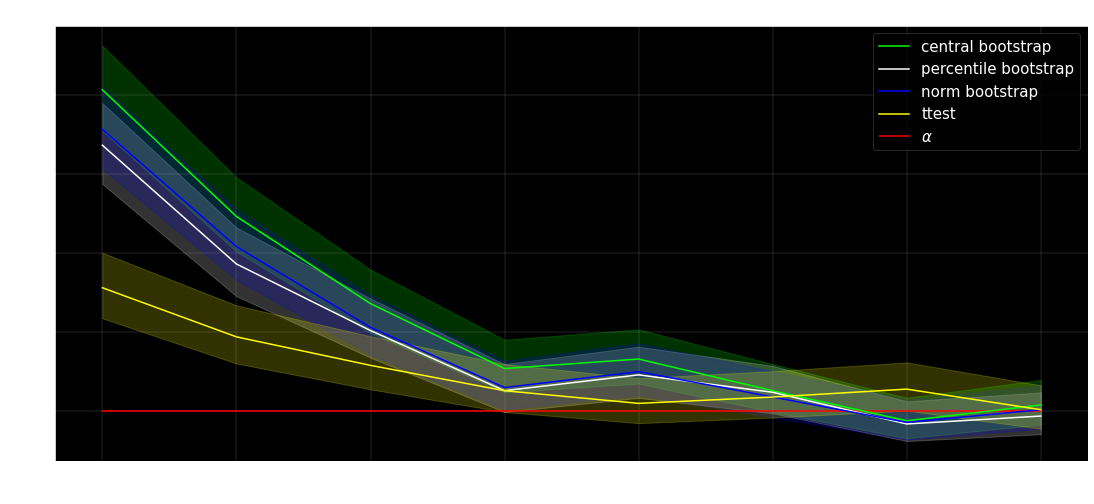

In [52]:
colors = ['lime', 'white', 'blue', 'yellow']
methods = ['central bootstrap', 'percentile bootstrap', 'norm bootstrap', 'ttest']
show_FPR(final_results, methods, colors)

 –ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –±—É—Ç—Å—Ç—Ä–∞–ø –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Ç–æ–≥–¥–∞ –∂–µ, –∫–æ–≥–¥–∞ –∏ t-test, –∞ –¥–æ —ç—Ç–æ–≥–æ –º–æ–º–µ–Ω—Ç–∞ —É –Ω–µ–≥–æ –æ—à–∏–±–∫–∞ —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ! 
 
–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —à–∏—Ä–∏–Ω—É –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ —É —ç—Ç–∏—Ö –º–µ—Ç–æ–¥–æ–≤.

In [53]:
N = 20
ex_sample = example_dist.rvs(N)
result = fast_bootstrap_ci(ex_sample, theta_func, alpha=0.05)
result['ttest'] = t.interval(alpha=0.755, loc=numpy.mean(ex_sample), df=len(ex_sample)-1, scale=stats.sem(ex_sample, ddof=1))


for method in result:
    left, right = result[method]
    print(f"{method} interval: ({round(left, 2)}. {round(right, 2)}), length={round(right - left, 2)}")

central bootstrap interval: (3.34. 6.76), length=3.42
percentile bootstrap interval: (3.45. 6.86), length=3.42
norm bootstrap interval: (3.42. 6.79), length=3.37
ttest interval: (4.04. 6.17), length=2.13


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –±—É—Ç—Å—Ç—Ä–∞–ø —Å–∏–ª—å–Ω–æ –∑–∞—É–∂–∞–µ—Ç —à–∏—Ä–∏–Ω—É –¥–æ–≤. –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞. –ü–æ—ç—Ç–æ–º—É –º—ã –∏ –ø–æ–ª—É—á–∞–µ–º –±–æ–ª—å—à–æ–π FPR —É –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –ø—Ä–∏ –º–∞–ª—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.

–≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ 
 - –ë—É—Ç—Å—Ç—Ä–∞–ø –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Ç–µ—Ö —Å–ª—É—á–∞—è—Ö, –∫–æ–≥–¥–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç t-test. –ò FPR —É –Ω–µ–≥–æ —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ.
 - –¢–æ–≥–¥–∞ –∂–µ, –∫–æ–≥–¥–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å t-test, –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –±—É—Ç—Å—Ç—Ä–∞–ø.

–¢–æ –µ—Å—Ç—å –ø—Ä–∏ –æ—Ü–µ–Ω–∫–µ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –±—É—Ç—Å—Ç—Ä–∞–ø –Ω–µ –ø–æ–º–æ–≥–∞–µ—Ç –≤ —Ç–µ—Ö —Å–ª—É—á–∞—è—Ö, –∫–æ–≥–¥–∞ t-test –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –æ–Ω –æ–ø–∞—Å–Ω–µ–π –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –≤ —ç—Ç–∏—Ö —Å–ª—É—á–∞—è—Ö.


–ù–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –º–æ—â–Ω–æ—Å—Ç—å —É –Ω–µ–≥–æ –±—É–¥–µ—Ç –±–æ–ª—å—à–µ?

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –∏ t-test, –∫–æ–≥–¥–∞ –º—ã –∑–Ω–∞–µ–º, —á—Ç–æ –æ–±–∞ –º–µ—Ç–æ–¥–∞ —Ä–∞–±–æ—Ç–∞—é—Ç:

In [54]:
N = 200
alpha = 0.05 
ex_sample = example_dist.rvs(N)
result = fast_bootstrap_ci(ex_sample, theta_func, alpha=alpha)
result['ttest'] = t.interval(alpha=1 - alpha, loc=numpy.mean(ex_sample), df=len(ex_sample)-1, scale=stats.sem(ex_sample, ddof=1))


for method in result:
    left, right = result[method]
    print(f"{method} interval: ({round(left, 2)}. {round(right, 2)}), length={round(right - left, 2)}")

central bootstrap interval: (3.97. 5.37), length=1.39
percentile bootstrap interval: (4.11. 5.5), length=1.39
norm bootstrap interval: (4.04. 5.44), length=1.4
ttest interval: (4.04. 5.43), length=1.39


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã —É –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –∏ t-test –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã, –∏ —ç—Ç–æ –ø—Ä–∏ –≤—ã–±–æ—Ä–∫–µ —Ä–∞–∑–º–µ—Ä–∞ 200. –ê –µ—Å–ª–∏ –≤–∑—è—Ç—å –±–æ–ª—å—à—É—é –≤—ã–±–æ—Ä–∫—É?

In [55]:
N = 10000
ex_sample = example_dist.rvs(N)
result = fast_bootstrap_ci(ex_sample, theta_func, alpha=alpha)
result['ttest'] = t.interval(alpha=1 - alpha, loc=numpy.mean(ex_sample), df=len(ex_sample)-1, scale=stats.sem(ex_sample, ddof=1))

for method in result:
    left, right = result[method]
    print(f"{method} interval: ({round(left, 2)}. {round(right, 2)}), length={round(right - left, 2)}")

central bootstrap interval: (4.91. 5.11), length=0.2
percentile bootstrap interval: (4.92. 5.12), length=0.2
norm bootstrap interval: (4.91. 5.11), length=0.2
ttest interval: (4.91. 5.11), length=0.2


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã. –ê —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ—â–Ω–æ—Å—Ç—å –±—É—Ç—Å—Ç—Ä–∞–ø-–∫—Ä–∏—Ç–µ—Ä–∏—è –Ω–µ –±—É–¥–µ—Ç –æ—Ç–ª–∏—á–∞—Ç—å—Å—è –æ—Ç –º–æ—â–Ω–æ—Å—Ç–∏ t-test-–∫—Ä–∏—Ç–µ—Ä–∏—è.

**–ü–æ—ç—Ç–æ–º—É, –µ—Å–ª–∏ –≤—ã –≤–∏–¥–∏—Ç–µ, —á—Ç–æ –±—É—Ç—Å—Ç—Ä–∞–ø –¥–∞–µ—Ç –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —É–∂–µ, —á–µ–º t-test, —Ç–æ —ç—Ç–∏–º –¥–∞–Ω–Ω—ã–º –Ω–µ–ª—å–∑—è –≤–µ—Ä–∏—Ç—å!** –û—á–µ–Ω—å –≤–µ—Ä–æ—è—Ç–Ω–æ, —á—Ç–æ —É –±—É—Ç—Å—Ç—Ä–∞–ø–∞ –≤ —ç—Ç–æ—Ç –º–æ–º–µ–Ω—Ç FPR –±–æ–ª—å—à–µ, —á–µ–º –∑–∞—è–≤–ª–µ–Ω!


–ò —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ: –¥–∞–≤–∞–π—Ç–µ —Å—Ä–∞–≤–Ω–∏–º –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã 2 –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤:

In [56]:
N = 100000
ex_sample = example_dist.rvs(N)

In [57]:
%%time
_ = fast_bootstrap_ci(ex_sample, theta_func, alpha=alpha)

CPU times: user 1.26 s, sys: 604 ms, total: 1.87 s
Wall time: 1.87 s


In [58]:
%%time
_ = t.interval(alpha=1 - alpha, loc=numpy.mean(ex_sample), df=len(ex_sample)-1, scale=stats.sem(ex_sample, ddof=1))


CPU times: user 1.82 ms, sys: 0 ns, total: 1.82 ms
Wall time: 1.23 ms


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞ –±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–∑–Ω–∏—Ü–∞ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ > 1000 —Ä–∞–∑! 

–ü–æ—á–µ–º—É —Ç–∞–∫ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç? 
1. –ù–∞ –æ–¥–Ω—É –±—É—Ç—Å—Ç—Ä–∞–ø –≤—ã–±–æ—Ä–∫—É —Ç—Ä–∞—Ç–∏—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ O(N) –≤—Ä–µ–º–µ–Ω–∏. –ê –Ω–∞ —Å–æ–∑–¥–∞–Ω–∏–µ B –≤—ã–±–æ—Ä–æ–∫ &mdash; `O(NB)` –≤—Ä–µ–º–µ–Ω–∏. –≠—Ç–æ –∏ –µ—Å—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ–µ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –±—É—Ç—Å—Ç—Ä–∞–ø–∞.
2.–£ T-test –∂–µ —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã –Ω–µ—Ç: –µ–º—É –Ω–∞–¥–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å —Ç–æ–ª—å–∫–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–∞ O(N), –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –∑–∞ O(N) –∏ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã –∫–≤–∞–Ω—Ç–∏–ª–µ–π –∑–∞ O(1) –≤—Ä–µ–º–µ–Ω–∏. 

–í –∏—Ç–æ–≥–µ –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ –±—É—Ç—Å—Ç—Ä–∞–ø —Ä–∞–±–æ—Ç–∞–µ—Ç –æ–∫–æ–ª–æ `B` —Ä–∞–∑ –¥–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏, —á—Ç–æ –º—ã –∏ —É–≤–∏–¥–µ–ª–∏ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö.


------

–ü–æ—ç—Ç–æ–º—É, –ø–æ–¥–≤–æ–¥—è –∏—Ç–æ–≥ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è t-test —Å bootstrap:
- bootstrap –Ω–µ–ª—å–∑—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å, –∫–æ–≥–¥–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç t-test. –ï–≥–æ FPR –±—É–¥–µ—Ç –±–æ–ª—å—à–µ, —á–µ–º —É t-test.
- bootstrap –Ω–µ –≤—ã–∏–≥—Ä—ã–≤–∞–µ—Ç –ø–æ –º–æ—â–Ω–æ—Å—Ç–∏ —É t-test. –û–Ω–∏ –¥–∞—é—Ç –∏–¥–µ–Ω—Ç–∏—á–Ω—ã–µ –¥–æ–≤. –∏–Ω—Ç—Ä–µ–≤–∞–ª—ã, –∫–æ–≥–¥–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ —Ä–∞–±–æ—Ç–∞—é—Ç.
- –æ–Ω —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Ç—ã—Å—è—á–∏ —Ä–∞–∑ –¥–æ–ª—å—à–µ, —á–µ–º t-test.

----


# –ò—Ç–æ–≥: —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é –±—É—Ç—Å—Ç—Ä–∞–ø–∞

- –ï—Å–ª–∏ –≤–∞–º –Ω—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –∫–∞–∫–æ–π-—Ç–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, —Ç–æ –±—É—Ç—Å—Ç—Ä–∞–ø –≤–∞—à –ª—É—á—à–∏–π –¥—Ä—É–≥. –û–Ω –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –≤–∞–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —É –æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, —Ç–∞–∫ –∏ –æ—Ü–µ–Ω–∏—Ç—å —Ä–∞–∑–Ω–æ—Å—Ç—Å—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –≤ AB-—Ç–µ—Å—Ç–µ, –º–µ–∂–¥—É —Ç–µ—Å—Ç–æ–º –∏ –∫–æ–Ω—Ç—Ä–æ–ª–µ–º.
- –ü—Ä–∏ —ç—Ç–æ–º –Ω–∞–¥–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ –Ω–∞ –º–∞–ª—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –µ–≥–æ –æ–ø–∞—Å–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å. –ü–æ—ç—Ç–æ–º—É –ø–æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏, –ø—Ä–æ–≤–µ—Ä—è–π—Ç–µ –Ω–∞ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ, –º–æ–∂–Ω–æ –ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π –≤ –≤–∞—à–µ–π –∑–∞–¥–∞—á–µ –∏–ª–∏ –Ω–µ—Ç.
- –¢–∞–∫–∂–µ –Ω–∞–¥–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ –±—É—Ç—Å—Ç—Ä–∞–ø –Ω–µ –ø–æ—Ñ–∏–∫—Å–∏—Ç –ø—Ä–æ–±–ª–µ–º—ã t-test: –µ–≥–æ –æ–ø–∞—Å–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–≥–¥–∞, –∫–æ–≥–¥–∞ t-test –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç. –í—ã –æ—à–∏–±–µ—Ç–µ—Å—å —Å —ç—Ç–∏–º –∫—Ä–∏—Ç–µ—Ä–∏–µ–º —Å–∏–ª—å–Ω–µ–µ.
- –ù—É –∏ –≥–ª–∞–≤–Ω–æ–µ: —ç—Ç–æ—Ç –∫—Ä–∏–µ—Ç—Ä–∏–π –æ—á–µ–Ω—å –¥–æ–ª–≥–æ —Ä–∞–±–æ—Ç–∞–µ—Ç. –ü–æ—ç—Ç–æ–º—É, –µ—Å–ª–∏ –≤–∞–º –Ω–∞–¥–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–π –¥–æ–ª–∂–µ–Ω –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≥–∏–≥–∞–Ω—Ç—Å–∫–æ–µ —á–∏—Å–ª–æ AB-—Ç–µ—Å—Ç–æ–≤, —Ç–æ –±—É—Ç—Å—Ç—Ä–∞–ø –≤–∞–º –Ω–µ –ø–æ–º–æ–∂–µ—Ç.
